In [3]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data= "../data/mouse_drug_data.csv"
clinical_trial_data= "../data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data)
clinical_trial_df = pd.read_csv(clinical_trial_data)

# Combine the data into a single dataset
ms_ct_cmbd_df = pd.merge(mouse_drug_df, clinical_trial_df, how="inner")

# Display the data table for preview
ms_ct_cmbd_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

# Set the index to the 'Drug' Column/Series
ms_ct_cmbd_df = ms_ct_cmbd_df.set_index('Drug')

# Rebuild the DataFrame grouped around Drug name
TV_grpdby_Drug_and_Timepoint = ms_ct_cmbd_df.loc[['Capomulin','Infubinol','Ketapril','Placebo'],['Timepoint',
                                                  'Tumor Volume (mm3)', 'Metastatic Sites', 'Mouse ID']]

# Group the DataFrame by 'Drug' & 'Timepoint'
TV_grpdby_Drug_and_Timepoint = TV_grpdby_Drug_and_Timepoint.groupby(['Drug','Timepoint'])

# Get the MTV (Mean Tumor Volume)
MTV_by_Drug_and_Timepoint = TV_grpdby_Drug_and_Timepoint['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
MTV_by_Drug_and_Timepoint_df = pd.DataFrame(MTV_by_Drug_and_Timepoint)

# Preview DataFrame
MTV_by_Drug_and_Timepoint_df = MTV_by_Drug_and_Timepoint_df.reset_index() # reset the index for formatting purposes
MTV_by_Drug_and_Timepoint_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
seTV_by_Drug_and_Timepoint = TV_grpdby_Drug_and_Timepoint.sem()
seTV_by_Drug_and_Timepoint = seTV_by_Drug_and_Timepoint['Tumor Volume (mm3)']

# Convert to DataFrame
seTV_by_Drug_and_Timepoint_df = pd.DataFrame(seTV_by_Drug_and_Timepoint)

# Preview DataFrame
seTV_by_Drug_and_Timepoint_df = seTV_by_Drug_and_Timepoint_df.reset_index()
seTV_by_Drug_and_Timepoint_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Create Pivot Tables with Drugs for Column Headers and Timepoint as Index for both DataFrames
MTV_Pivot = pd.pivot_table(MTV_by_Drug_and_Timepoint_df, index='Timepoint',columns='Drug',
                           values='Tumor Volume (mm3)')



seTV_Pivot = pd.pivot_table(seTV_by_Drug_and_Timepoint_df, index='Timepoint',columns='Drug',
                           values='Tumor Volume (mm3)')

# Preview that Reformatting worked
MTV_Pivot = MTV_Pivot.reset_index()
MTV_Pivot

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417
5,25,39.939528,55.715252,57.678982,57.482574
6,30,38.769339,58.299397,60.994507,59.809063
7,35,37.816839,60.742461,63.371686,62.420615
8,40,36.958001,63.162824,66.068580,65.052675
9,45,36.236114,65.755562,70.662958,68.084082


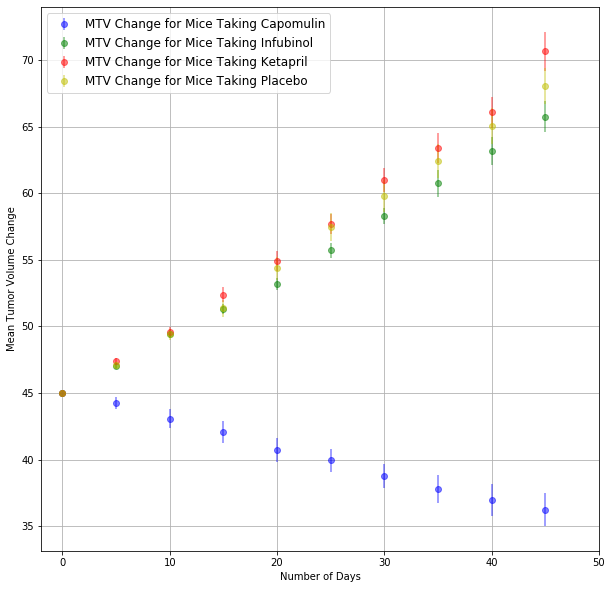

In [7]:
# Generate the Plot for Mean Tumor Volume (with Error Bars) 
# =========================================================

# Create the plot and artists
fig, ax = plt.subplots(figsize=(10,10))

ax.errorbar(x= MTV_Pivot['Timepoint'],y= MTV_Pivot['Capomulin'], yerr=seTV_Pivot['Capomulin'], fmt="o", color="b",
            alpha=0.5, label="MTV Change for Mice Taking Capomulin")

ax.errorbar(x= MTV_Pivot['Timepoint'],y= MTV_Pivot['Infubinol'], yerr=seTV_Pivot['Infubinol'], fmt="o", color="g",
            alpha=0.5, label="MTV Change for Mice Taking Infubinol")

ax.errorbar(x= MTV_Pivot['Timepoint'],y= MTV_Pivot['Ketapril'], yerr=seTV_Pivot['Ketapril'], fmt="o", color="r",
            alpha=0.5, label="MTV Change for Mice Taking Ketapril")

ax.errorbar(x= MTV_Pivot['Timepoint'],y= MTV_Pivot['Placebo'], yerr=seTV_Pivot['Placebo'], fmt="o", color="y",
            alpha=0.5, label="MTV Change for Mice Taking Placebo")


# Set the x axis limits
ax.set_xlim(-2, ((MTV_Pivot['Timepoint']).max())+5)

# Label the x and y axes
ax.set_xlabel("Number of Days")
ax.set_ylabel("Mean Tumor Volume Change")

# Create the legend
plt.legend(loc="best", fontsize="large", fancybox=True)

# Add a grid
plt.grid()

# Save the Figure
plt.savefig("../Images/Affects of Drugs on Mean Tumor Volume Change in Mice (45 Days).png")

## Metastatic Response to Treatment

In [8]:
# Store the Mean Metastatic Site Data Grouped by Drug and Timepoint 
MMS_by_Drug_and_Timepoint = TV_grpdby_Drug_and_Timepoint['Metastatic Sites'].mean()

# Convert to DataFrame
MMS_by_Drug_and_Timepoint_df = pd.DataFrame(MMS_by_Drug_and_Timepoint)

# Preview DataFrame
MMS_by_Drug_and_Timepoint_df = MMS_by_Drug_and_Timepoint_df.reset_index()
MMS_by_Drug_and_Timepoint_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [9]:
# Store the Standard Error associated with Metastatic Sites Grouped by Drug and Timepoint 
seMS_by_Drug_and_Timepoint = TV_grpdby_Drug_and_Timepoint.sem()
seMS_by_Drug_and_Timepoint = seMS_by_Drug_and_Timepoint['Metastatic Sites']

# Convert to DataFrame
seMS_by_Drug_and_Timepoint_df = pd.DataFrame(seMS_by_Drug_and_Timepoint)

# Preview DataFrame
seMS_by_Drug_and_Timepoint_df = seMS_by_Drug_and_Timepoint_df.reset_index()
seMS_by_Drug_and_Timepoint_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [11]:
# Create Pivot Tables with Drugs for Column Headers and Timepoint as Index for both DataFrames
MMS_Pivot = pd.pivot_table(MMS_by_Drug_and_Timepoint_df, index='Timepoint',columns='Drug',
                           values='Metastatic Sites')


seMS_Pivot = pd.pivot_table(seMS_by_Drug_and_Timepoint_df, index='Timepoint',columns='Drug',
                           values='Metastatic Sites')

# Preview that Reformatting worked
MMS_Pivot = MMS_Pivot.reset_index()
MMS_Pivot

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.280000,0.304348,0.375000
2,10,0.320000,0.666667,0.590909,0.833333
3,15,0.375000,0.904762,0.842105,1.250000
4,20,0.652174,1.050000,1.210526,1.526316
5,25,0.818182,1.277778,1.631579,1.941176
6,30,1.090909,1.588235,2.055556,2.266667
7,35,1.181818,1.666667,2.294118,2.642857
8,40,1.380952,2.100000,2.733333,3.166667
9,45,1.476190,2.111111,3.363636,3.272727


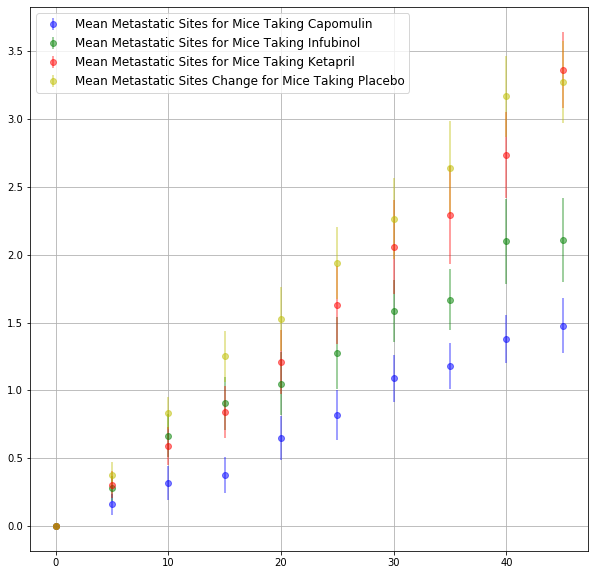

In [39]:
# Generate the Plot for Mean Metastatic Sites (with Error Bars) 
# ============================================================

# Create the plot and artists
fig, ax2 = plt.subplots(figsize=(10,10))


ax2.errorbar(x= MMS_Pivot['Timepoint'],y= MMS_Pivot['Capomulin'], yerr=seMS_Pivot['Capomulin'], fmt="o", color="b",
            alpha=0.5, label="Mean Metastatic Sites for Mice Taking Capomulin")

ax2.errorbar(x= MMS_Pivot['Timepoint'],y= MMS_Pivot['Infubinol'], yerr=seMS_Pivot['Infubinol'], fmt="o", color="g",
            alpha=0.5, label="Mean Metastatic Sites for Mice Taking Infubinol")

ax2.errorbar(x= MMS_Pivot['Timepoint'],y= MMS_Pivot['Ketapril'], yerr=seMS_Pivot['Ketapril'], fmt="o", color="r",
            alpha=0.5, label="Mean Metastatic Sites for Mice Taking Ketapril")

ax2.errorbar(x= MMS_Pivot['Timepoint'],y= MMS_Pivot['Placebo'], yerr=seMS_Pivot['Placebo'], fmt="o", color="y",
            alpha=0.5, label="Mean Metastatic Sites Change for Mice Taking Placebo")


# Set the x limits
ax.set_xlim(-2, ((MMS_Pivot['Timepoint']).max())+5)

# Set Tick labels
x = np.arange(MMS_Pivot['Timepoint'][0], MMS_Pivot['Timepoint'].iloc[-1] + 5, step=5)
tick_locations = [value for value in x]

# Rename the x and y axes
ax.set_xlabel("Number of Days")
ax.set_ylabel("Mean Metastatic Sites")

# Create the legend
plt.legend(loc="best", fontsize="large", fancybox=True)

# Add a grid
plt.grid()


# Save the Figure
plt.savefig("../Images/Affects of Drugs on Mean Metastatic Sites in Mice (45 Days).png")


## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint
MouseCount = TV_grpdby_Drug_and_Timepoint['Mouse ID'].count()

# Convert to DataFrame
MouseCount_df = pd.DataFrame(MouseCount)

# Preview DataFrame
MouseCount_df = MouseCount_df.rename(columns={'Mouse ID': 'Mouse Count'})
MouseCount_df.head()


Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [14]:
# Minor Data Munging to Re-Format the Data Frames
MouseCount_Pivot = pd.pivot_table(MouseCount_df, index='Timepoint',columns='Drug',
                           values='Mouse Count')
# Preview the Data Frame
MouseCount_Pivot

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


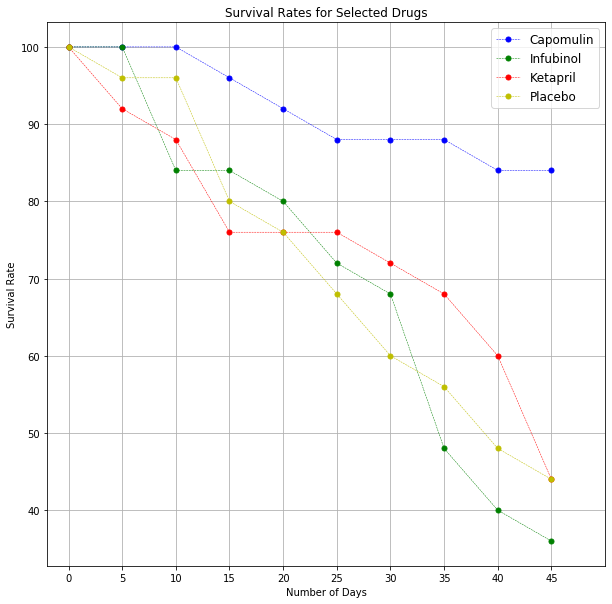

In [37]:
# Generate the Plot for Survial Rates 
# ===================================

# Calculate the Survival Rates
Capomulin_Survival_Rate = MouseCount_Pivot['Capomulin']/25 * 100
Infubinol_Survival_Rate = MouseCount_Pivot['Infubinol']/25 * 100
Ketapril_Survival_Rate = MouseCount_Pivot['Ketapril']/25 * 100
Placebo_Survival_Rate = MouseCount_Pivot['Placebo']/25 * 100

# Create the 10 x 10 Figure
plt.figure(figsize=(10,10))

# Create the plot artists with dashed lines
plt.plot(Capomulin_Survival_Rate, "bo",linestyle="dashed",markersize=5, linewidth = 0.50)
plt.plot(Infubinol_Survival_Rate, "go",linestyle="dashed",markersize=5, linewidth = 0.50)
plt.plot(Ketapril_Survival_Rate, "ro",linestyle="dashed",markersize=5, linewidth = 0.50)
plt.plot(Placebo_Survival_Rate, "yo",linestyle="dashed",markersize=5, linewidth = 0.50)

# Set the x-axis limits
plt.xlim(-2, ((MMS_Pivot['Timepoint']).max())+5)

# Set Tick labels
x = np.arange(MMS_Pivot['Timepoint'][0], MMS_Pivot['Timepoint'].iloc[-1] + 5, step=5)
tick_locations = [value for value in x]


# Use functions to label the percentages of changes according to Drug
plt.xticks(tick_locations, MMS_Pivot['Timepoint'])

# Create the Title and axes labels
plt.title("Survival Rates for Selected Drugs")
plt.xlabel("Number of Days")
plt.ylabel("Survival Rate")

# Add a grid
plt.grid()

# Add the legend
plt.legend(['Capomulin', 'Infubinol','Ketapril','Placebo'],loc="best", fontsize="large", fancybox=True)

# Save the Figure
plt.savefig("../Images/Affects of Drugs on Survival Rates in Mice (45 Days).png")

# Show the Figure
plt.show()

In [36]:
print(x)

[ 0  5 10 15 20 25 30 35 40]


## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug
tumor_pct_change =  100 * (MTV_Pivot.iloc[-1] - MTV_Pivot.iloc[0]) / MTV_Pivot.iloc[0]

# Display the data to confirm
tumor_pct_change


Drug
Timepoint          inf
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

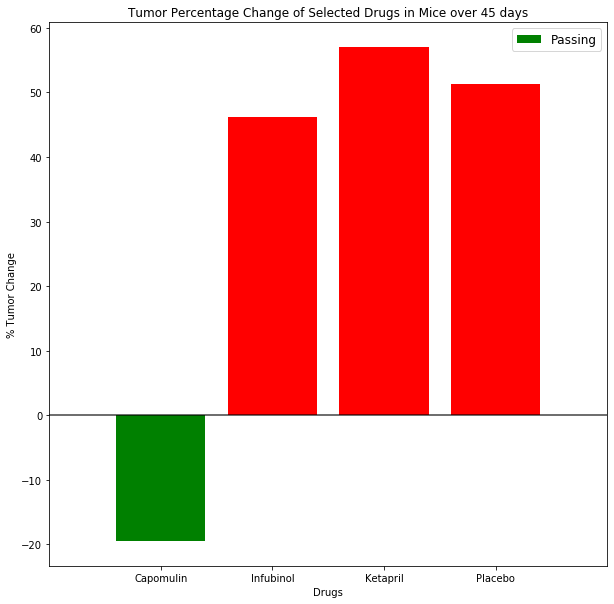

In [20]:
# Store all Relevant Percent Changes into a Tuple
tumor_pct_change_tuple = (tumor_pct_change[1],tumor_pct_change[2],tumor_pct_change[3],tumor_pct_change[4])
#drug_list = [for drug in tumor_pct_change.iloc[:,0]]
    
# Splice the data between passing and failing drugs
passing_drugs = tumor_pct_change_tuple[0]
failing_drugs = tumor_pct_change_tuple[1:4]


# Orient widths. Add labels, tick marks, etc. 
plt.figure(figsize=(10,10))
x = np.arange(len(tumor_pct_change_tuple))
plt.xlim(-1, len(tumor_pct_change_tuple))
tick_locations = [value for value in x]


# Use functions to label the percentages of changes according to Drug
Drugs = MTV_by_Drug_and_Timepoint_df['Drug'].unique()
plt.xticks(tick_locations, Drugs)

# Call functions to implement the function calls

plt.bar(x, tumor_pct_change_tuple, color=['green','red','red','red'], label="Passing")
plt.legend(loc="best", fontsize="large", fancybox=True)
plt.hlines(0, -1, len(tumor_pct_change_tuple), alpha=0.75)

plt.title("Tumor Percentage Change of Selected Drugs in Mice over 45 days")
plt.xlabel("Drugs")
plt.ylabel("% Tumor Change")

# Save the Figure
plt.savefig("../Images/Tumor % Change of Selected Drugs in Mice over 45 Days")


# Show the Figure
fig.show()
